In [1]:
import sympy as smp

In [6]:
x, a, R = smp.symbols('x, a, R')

In [4]:
l = smp.sqrt(4 * a*a * x*x + 1)
l

sqrt(4*a**2*x**2 + 1)

In [7]:
smp.integrate(l, (x, 0, R))

R*sqrt(4*R**2*a**2 + 1)/2 + asinh(2*R*a)/(4*a)

In [8]:
smp.diff(smp.sqrt(x))

1/(2*sqrt(x))

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [167]:
X = np.linspace(0,15,100)

def l(r, a=1):
    return r * np.sqrt(np.square(2*r*a) + 1) / 2 + np.arcsinh(2*r*a) / (4*a)


def l_smp(r, a=1):
    return r * smp.sqrt((2*r*a)*(2*r*a) + 1) / 2 + smp.asinh(2*r*a) / (4*a)


In [168]:
series = smp.series(l_smp(x, a), x, n=10)
series = series.removeO()
series

-10*a**8*x**9/9 + 4*a**6*x**7/7 - 2*a**4*x**5/5 + 2*a**2*x**3/3 + x

In [169]:
series.subs(x,1)

-10*a**8/9 + 4*a**6/7 - 2*a**4/5 + 2*a**2/3 + 1

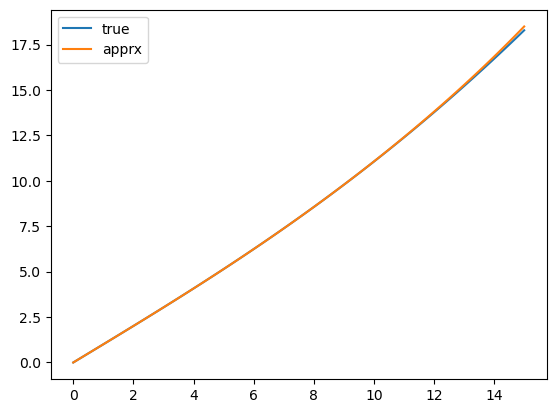

In [170]:
a0 = 6/144
plt.plot(X, l(X, a0), label='true')
plt.plot(X, X + 2*a0**2*(X**3)/3 - 2*(a0**4)*(X**5)/5 + 4*(a0**6)*(X**7)/7, label='apprx')
plt.legend()

In [171]:
def apprx_sol(X, a0):
    return X + 2*a0**2*(X**3)/3 - 2*(a0**4)*(X**5)/5 + 4*(a0**6)*(X**7)/7;

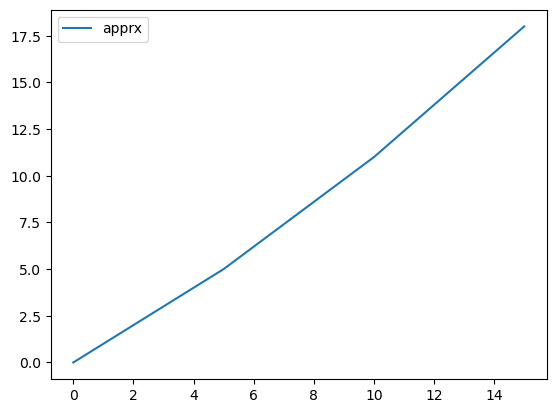

In [174]:
a0 = 6/144
Y = l(X, a0)
# plt.plot(X, Y, label='true')
plt.plot(X, 1 * X * (X<5) + (1.2 * (X-5) + 5*1)*((X>=5) & (X<10)) + (1.4 * (X-10) + 1.2 * (10-5) + 5*1) * (X>=10), label='apprx')
plt.legend()

```
- [0cm; 5cm] - k=1
- [5cm; 10cm] - k=1.2
- [10cm, 14cm] - k=1.4
```

In [184]:
def x_of_l(l):
    # l0 = [0, 5, 5 + 5*1.2]
    if l < 5:
        return l
    if l < 11:
        return 5 + (1/1.2)*(l-5)
    return 10 + (1/1.4)*(l-11) 

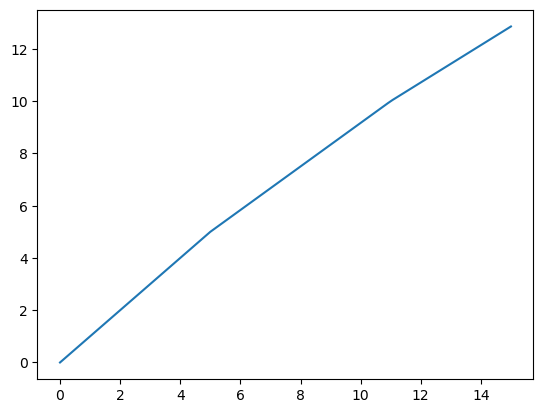

In [185]:
plt.plot(X, [x_of_l(x) for x in X])

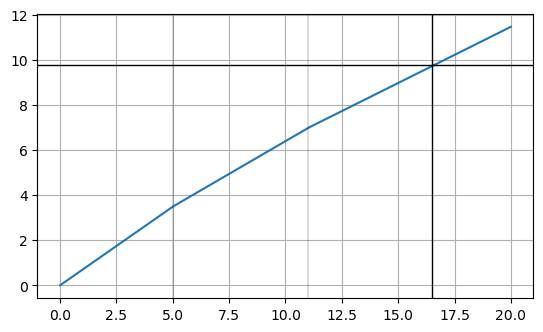

In [205]:
L = np.linspace(0, 20, 200)
W = 2 * np.pi * np.vectorize(x_of_l)(L) / 9
plt.plot(L, W)
plt.grid()
plt.axhline(2 * np.pi * 14 / 9, lw=1, c='k')
plt.axvline(16.5, lw=1, c='k')
plt.axvline(5, lw=0.2, c='k')
plt.axvline(11,lw=0.2, c='k')
plt.gca().set_aspect(1)

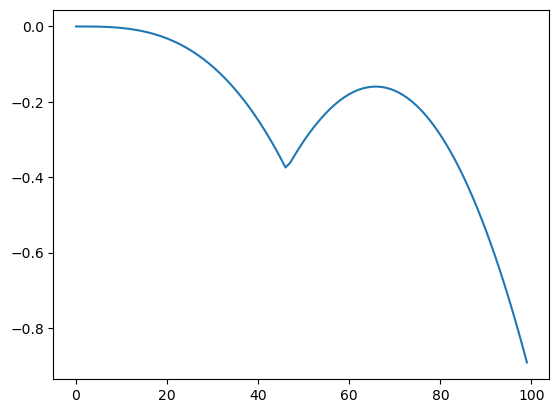

In [173]:
Z = 1 * X * (X<7) + (1.3 * (X-7) + 7*1)*(X >= 7)
plt.plot(Z - Y)

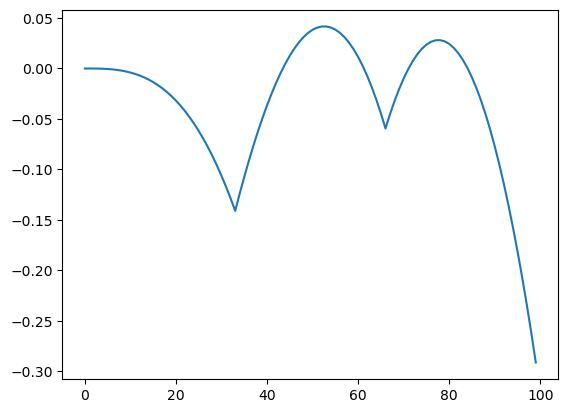

In [178]:
Z = 1 * X * (X<5) + (1.2 * (X-5) + 5*1)*((X>=5) & (X<10)) + (1.4 * (X-10) + 1.2 * (10-5) + 5*1) * (X>=10)
plt.plot(Z - Y)